# Visualizing the course of the Russian ruble in 2022

### 1. Introduction

The Russian ruble has made the headlines on several occasions in 2022. Having plummeted in early March as a consequence of the Russian invasion of Ukraine, it later reached a seven-year high in late June. In this project, we will visualize the course of the ruble exchange rate throughout the year. We will do so by retrieving data from APILayer's Exchange Rate API. The exchange rate of the Russian ruble will be compared to the euro, the American dollar, the British pound and the Swiss franc. 

### 2. Data preparation

#### Importing modules

In [ ]:
import requests
import pandas as pd
import numpy as np

#### Requesting ruble 2022 exchange rates

In [53]:
headers = {"apikey": "pPSXMG0dXSxkOZcvViOKuiczTyOBJJWV"}
params = {"end_date": "2022-06-21",
          "start_date": "2022-01-01",
#           "base": "RUB",
#           "symbols": ["EUR", "USD", "CNY", "CHF", "JPY"]
         }

# response = requests.get("https://api.apilayer.com/exchangerates_data/timeseries?base=RUB&symbols=EUR,GBP,USD,CNY,CHF,JPY", 
#                         headers=headers, 
#                         params=params)

status_code = response.status_code
print(status_code)
ruble = response.json()

200


In [54]:
#printing variables for inspection purposes
# print(ruble.keys())
# print(type(ruble))

In [55]:
rates = ruble["rates"]
# print(rates)

rubdf = pd.DataFrame.from_dict(rates, orient='index')
ruble = rubdf.copy()

#### Cleaning and preparing the dataset

In [56]:
ruble = ruble.reset_index().rename(columns={'index': 'date'})
print(ruble.head())

         date       EUR       GBP       USD       CNY       CHF       JPY
0  2022-01-01  0.011758  0.009881  0.013370  0.084982  0.012190  1.539050
1  2022-01-02  0.011721  0.009859  0.013331  0.084728  0.012159  1.534899
2  2022-01-03  0.011894  0.009968  0.013439  0.085422  0.012345  1.550093
3  2022-01-04  0.011770  0.009815  0.013281  0.084402  0.012168  1.542710
4  2022-01-05  0.011525  0.009618  0.013038  0.082872  0.011962  1.514063


In [62]:
ruble['date'] = pd.to_datetime(ruble['date'])
print(ruble.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    172 non-null    datetime64[ns]
 1   EUR     172 non-null    float64       
 2   GBP     172 non-null    float64       
 3   USD     172 non-null    float64       
 4   CNY     172 non-null    float64       
 5   CHF     172 non-null    float64       
 6   JPY     172 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.5 KB
None


In [70]:
rolling = ruble.copy()
rolling.iloc[:,1:] = rolling.iloc[:,1:].rolling(7).mean()

### 3. Creating the plot

In [125]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style as style

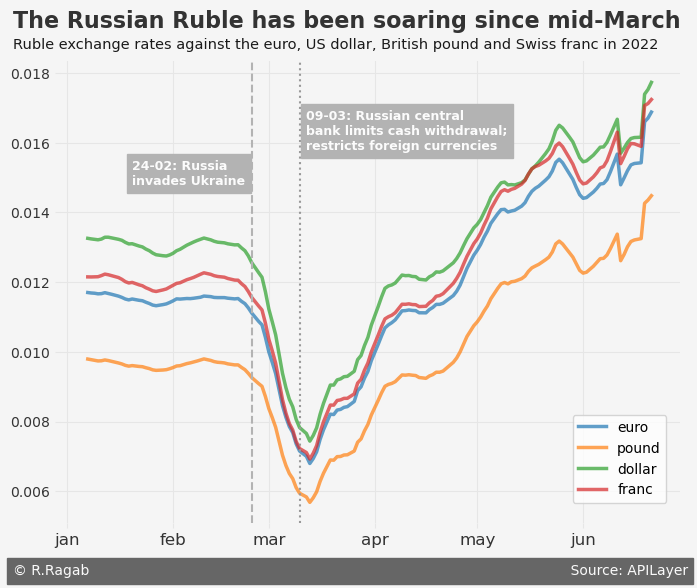

In [361]:
#creating the figure and axis
fig, ax = plt.subplots(figsize=(8,6))

#setting the figure and axis background color
fig.set_facecolor('0.96')
ax.set_facecolor('0.96')

#creating the plot
ax.plot(rolling['date'], rolling['EUR'], label='euro', linewidth=2.5, alpha=0.7)
ax.plot(rolling['date'], rolling['GBP'], label='pound', linewidth=2.5, alpha=0.7)
ax.plot(rolling['date'], rolling['USD'], label='dollar', linewidth=2.5, alpha=0.7)
ax.plot(rolling['date'], rolling['CHF'], label='franc', linewidth=2.5, alpha=0.7)

#modifying the x-axis tick labels
ax.xaxis.set_ticks([18993, 19024, 19052, 19083, 19113, 19144])
ax.xaxis.set_ticklabels(['jan', 'feb', 'mar', 'apr', 'may', 'jun'], size=12)

#removing spines
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)
    
#changing tick param color and adding a grid
ax.tick_params(axis='both', labelcolor='0.2', color='0.9')
ax.grid(axis='both', color='0.9')

#adding text
ax.text(x = 18977, y = 0.0193, s = "The Russian Ruble has been soaring since mid-March", size=16, weight='bold', color = '0.2')
ax.text(x = 18977, y = 0.0187, s = "Ruble exchange rates against the euro, US dollar, British pound and Swiss franc in 2022", size = 10.5, color = '0.1')
ax.text(x = 18977, y = 0.0036, s = "© R.Ragab" + 110*" " + "Source: APILayer", color = '0.98', backgroundcolor = '0.4')

#adding lines and text for context
ax.axvline(x = 19047, linestyle='--', color='0.7')
ax.axvline(x = 19061, linestyle=':', color='0.6')
ax.text(x = 19012, y = 0.0148, s = "24-02: Russia\ninvades Ukraine", size=9, color='0.99', weight='bold', backgroundcolor='0.7')
ax.text(x = 19063, y = 0.0158, s = "09-03: Russian central\nbank limits cash withdrawal;\nrestricts foreign currencies", size=9, color='0.99', weight='bold', backgroundcolor='0.7')

#adding a legend
ax.legend(bbox_to_anchor=(0.99, 0.25))


plt.savefig('Russian Ruble 2022.png', bbox_inches = "tight")
plt.show()

### 4. Conclusion

The plot shows how the exchange rate of the Russian ruble remained relatively stable against other currencies in the buildup to 24 February. It then plunged, following the invasion of Ukraine and subsequent reactions throughout the world. After the Russian central bank imposed a set of strict measures to stabilize the ruble exchange rate, it started climbing and returned to pre-war levels in late April, only to reach a seven-year high in late June.
Although the Japanese yen and the Chinese yuan were also included in the API request, they have been left out of the plot as their vastly different exchange rates against the ruble would have flattened the other four lines. 
A seven-day moving average of exchange rates has been applied to limit the number of data points and smoothen the plot lines.
